In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Nadam
from keras.callbacks import EarlyStopping
import numpy as np
from os.path import join
from pickle import load
import shutil
from sklearn.metrics import mean_squared_error
import keras.backend as K
import random
import os
import datetime

In [145]:
dataSetDir = '../DATASET'
scalerDir  = '../SCALER'
numFold = 0

load_train = np.load(join(dataSetDir,f"{numFold}_fold_final_train.npz"))
load_test = np.load(join(dataSetDir,f"{numFold}_fold_final_test.npz"))
load_scaler4Y_moBHWT = load(open(join(scalerDir,f"{numFold}_fold_scaler4Y_moBHWT.pkl"), 'rb'))

In [146]:
load_train["final_X_train"].shape

(722, 4242, 1)

In [164]:
Y_moBHWT_train = load_train["final_Y_moBHWT_train"][0]
Y_moBHWT_train = tf.convert_to_tensor(Y_moBHWT_train,dtype='float32')

Y_moBHWT_train_2 = load_train["final_Y_moBHWT_train"][3]
Y_moBHWT_train_2 = tf.convert_to_tensor(Y_moBHWT_train_2,dtype='float32')

In [165]:
y_true =Y_moBHWT_train
y_pred =Y_moBHWT_train_2
NumAxis = 1


In [166]:
y_true_pick = tf.transpose(tf.reshape(tf.squeeze(y_true), [3,-1]))[:,NumAxis] # 수정 !!!!
y_pred_pick = tf.transpose(tf.reshape(tf.squeeze(y_pred), [3,-1]))[:,NumAxis] # 수정 !!!!

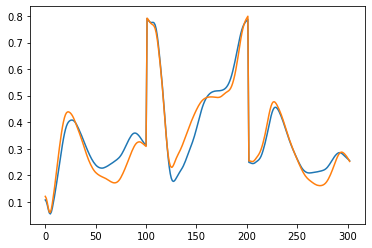

In [167]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([_ for _ in range(0,303)])
ypoints = np.array(y_true)
ypoints_2 = np.array(y_pred)

plt.plot(xpoints, ypoints,xpoints, ypoints_2)
plt.show()

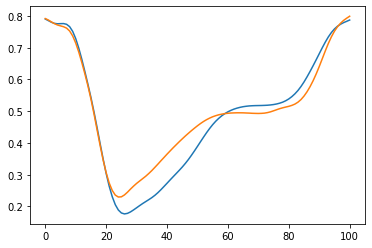

In [169]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([_ for _ in range(0,101)])
ypoints = np.array(y_true_pick)
ypoints_2 = np.array(y_pred_pick)

plt.plot(xpoints, ypoints,xpoints, ypoints_2)
plt.show()

In [170]:
y_true_pick_afterscaler = (y_true_pick - K.constant(load_scaler4Y_moBHWT.min_[NumAxis])) / K.constant(load_scaler4Y_moBHWT.scale_[NumAxis])
y_pred_pick_afterscaler = (y_pred_pick - K.constant(load_scaler4Y_moBHWT.min_[NumAxis])) / K.constant(load_scaler4Y_moBHWT.scale_[NumAxis])

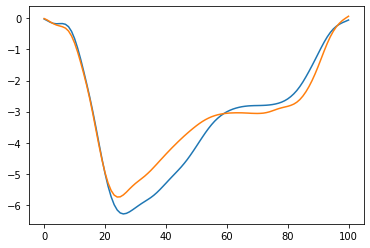

In [175]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([_ for _ in range(0,101)])
ypoints = np.array(y_true_pick_afterscaler)
ypoints_2 = np.array(y_pred_pick_afterscaler)

plt.plot(xpoints, ypoints,xpoints, ypoints_2)
plt.show()

In [209]:
100 * np.sqrt(np.mean(np.square(y_pred_pick_afterscaler - y_true_pick_afterscaler))) / (np.max(y_true_pick_afterscaler) - np.min(y_true_pick_afterscaler))

7.493002616455157

In [210]:

# default is RMSE, squaredbool, default=True If True returns MSE value, if False returns RMSE value.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
@tf.function
def goal(y_pred, y_true):
    X = 100 * K.sqrt(K.mean(K.square(y_pred - y_true))) / (K.max(y_true) - K.min(y_true))
    return X
@tf.function    
def _goal(y_pred, y_true):
    X = y_pred - y_true
    return X

X_Axis_RMSE_pct = goal(y_pred_pick_afterscaler,y_true_pick_afterscaler)
X_Axis_RMSE_pct.numpy()

7.493003

In [195]:
for tensor in tf.get_default_graph().get_operations():
    print (tensor.name)

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [194]:
W = graph.get_tensor_by_name("RealDiv_11:0")
print(W.eval())

KeyError: "The name 'RealDiv_11:0' refers to a Tensor which does not exist. The operation, 'RealDiv_11', does not exist in the graph."

In [48]:
tf.print(X_Axis_RMSE_pct)

AttributeError: 'Tensor' object has no attribute '_datatype_enum'